In [29]:
import pandas as pd
import numpy as np

In [30]:
# reading data
df = pd.read_csv('data.csv',index_col=0)
df.head()

,A,B
0,200,500
1,700,750
2,250,450
3,300,550
4,600,300


In [31]:
# Now do the following steps in each iteration
# 1. Create euclidean distance matrix
# 2. Combine the two closest clusters, ignoring diagonal
# 3. Repeat until only one cluster is left

# 1. Create euclidean distance matrix
def euclidean_distance_matrix(df):
    # create a matrix of zeros
    dist = np.zeros((len(df),len(df)))
    # fill the matrix with euclidean distances
    for i in range(len(df)):
        for j in range(len(df)):
            dist[i,j] = np.linalg.norm(df.iloc[i]-df.iloc[j])
    return dist

# 2. Combine the two closest clusters, ignoring diagonal
def combine_clusters(dist):
    # find the minimum value in the matrix
    min_val = np.min(dist[np.nonzero(dist)])
    # find the indices of the minimum value
    min_idx = np.where(dist==min_val)
    # combine the two clusters
    dist[min_idx[0][0],:] = dist[min_idx[0][0],:] + dist[min_idx[0][1],:]
    dist[:,min_idx[0][0]] = dist[:,min_idx[0][0]] + dist[:,min_idx[0][1]]
    # set the diagonal to 0
    dist[min_idx[0][0],min_idx[0][0]] = 0
    # set the other value to 0
    dist[min_idx[0][1],:] = 0
    dist[:,min_idx[0][1]] = 0
    return dist

# 3. Repeat until only one cluster is left
def cluster(df):
    # create euclidean distance matrix
    dist = euclidean_distance_matrix(df)
    # combine clusters until only one cluster is left
    while len(dist) > 1:
        dist = combine_clusters(dist)
    return dist

In [35]:
temp=pd.DataFrame(euclidean_distance_matrix(df))
# round the values to nearest integer
temp.round(0)

,0,1,2,3,4,5,6,7,8,9
0,0.0,559.0,71.0,112.0,447.0,335.0,610.0,492.0,728.0,361.0
1,559.0,0.0,541.0,447.0,461.0,447.0,100.0,71.0,206.0,626.0
2,71.0,541.0,0.0,112.0,381.0,269.0,602.0,472.0,696.0,292.0
3,112.0,447.0,112.0,0.0,391.0,283.0,500.0,381.0,618.0,364.0
4,447.0,461.0,381.0,391.0,0.0,112.0,559.0,403.0,500.0,224.0
5,335.0,447.0,269.0,283.0,112.0,0.0,539.0,381.0,532.0,180.0
6,610.0,100.0,602.0,500.0,559.0,539.0,0.0,158.0,250.0,716.0
7,492.0,71.0,472.0,381.0,403.0,381.0,158.0,0.0,250.0,559.0
8,728.0,206.0,696.0,618.0,500.0,532.0,250.0,250.0,0.0,707.0
9,361.0,626.0,292.0,364.0,224.0,180.0,716.0,559.0,707.0,0.0


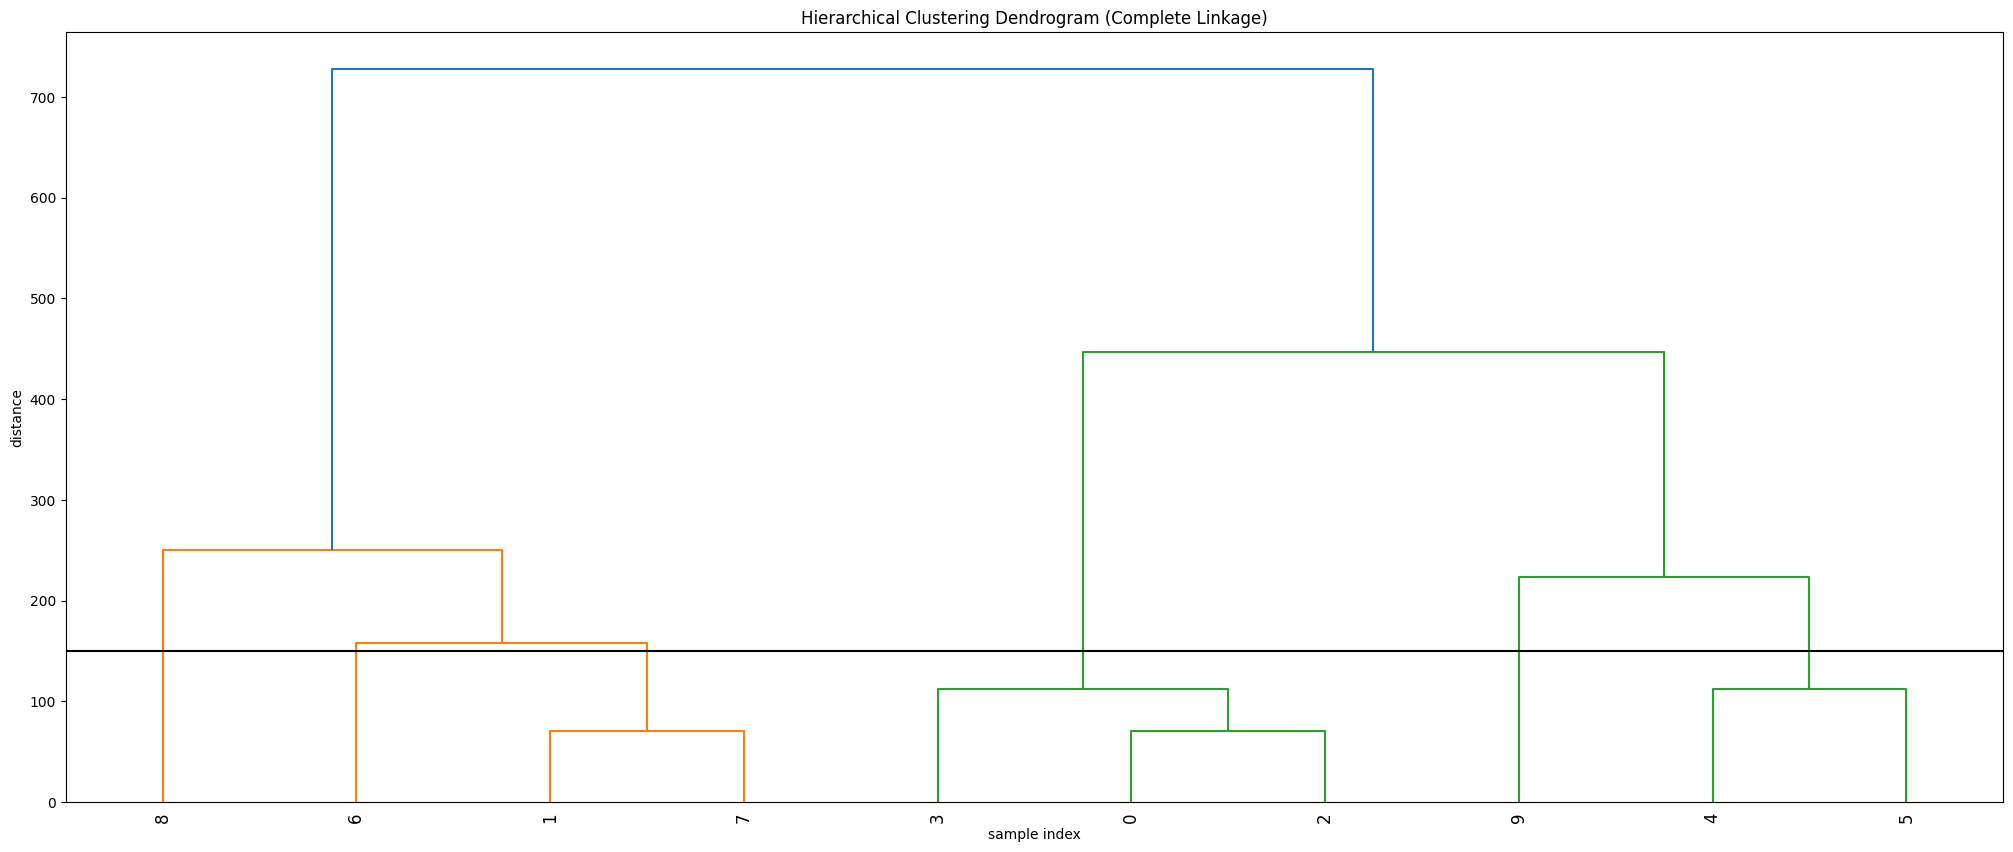

In [33]:
# plot a dendrogram for complete linkage using euclidean distance

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
Z = linkage(df, 'complete')

# set cut-off to 150
max_d = 150

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=150,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)

plt.axhline(y=max_d, c='k')
plt.show()

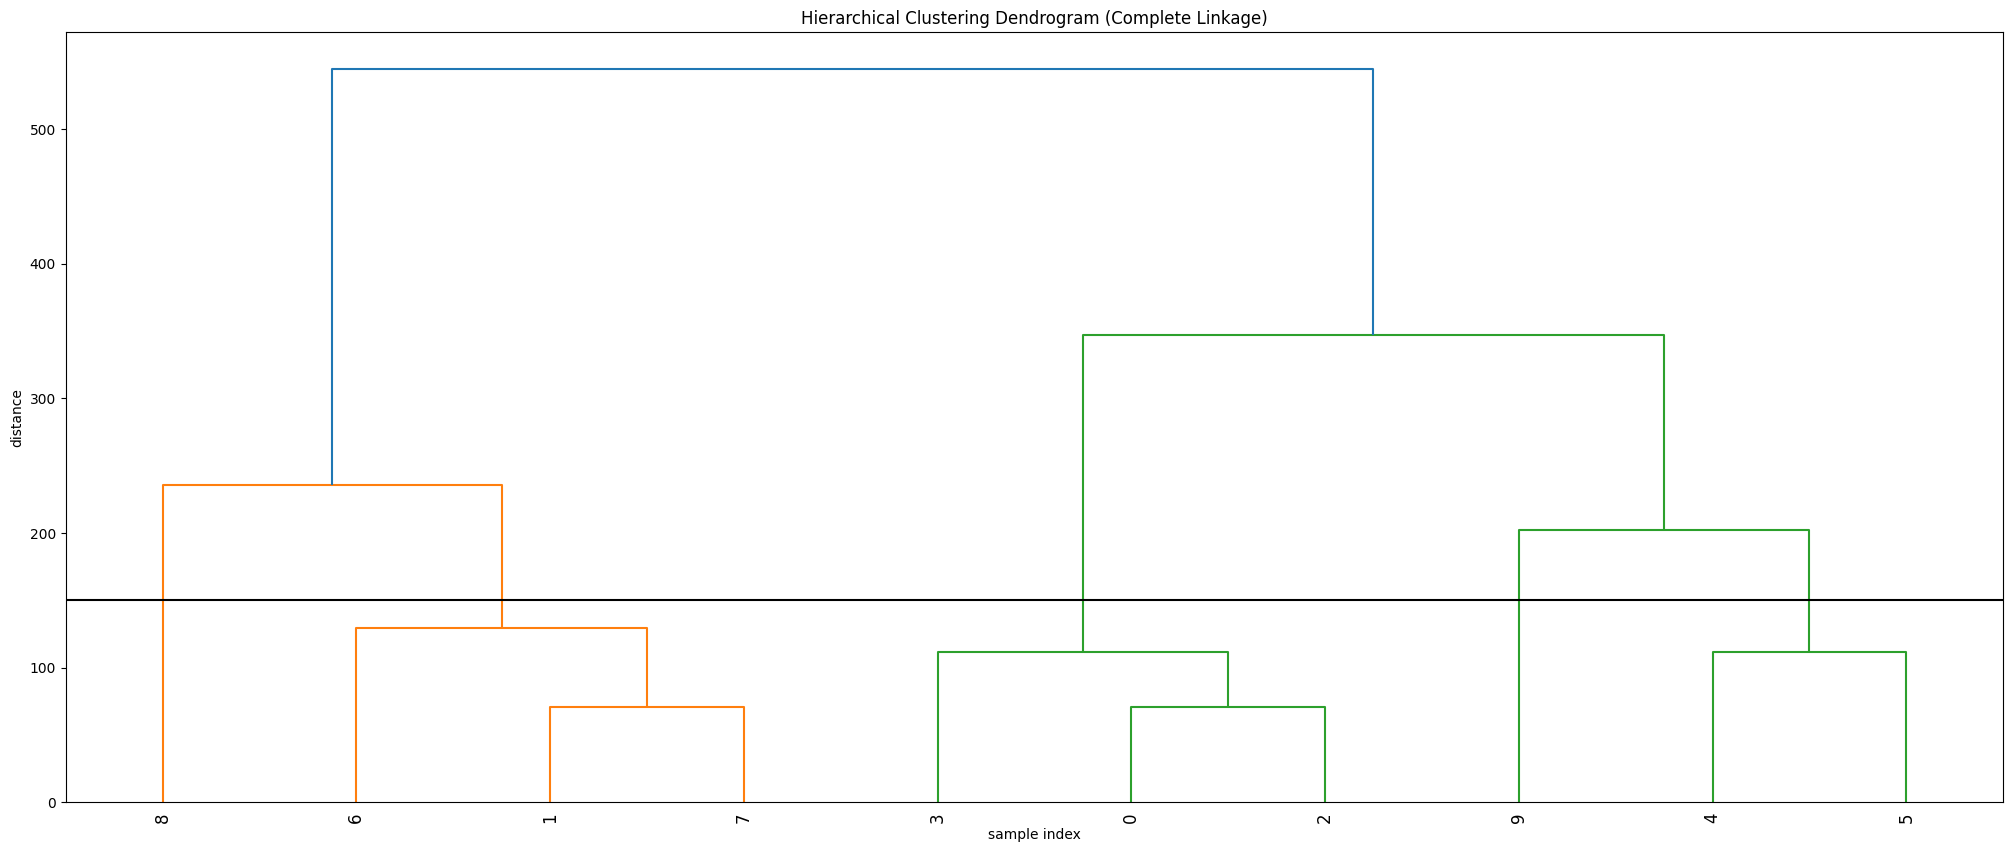

In [37]:
# plot a dendrogram for complete linkage using euclidean distance

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
Z = linkage(df, 'average')

# set cut-off to 150
max_d = 150

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=150,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)

plt.axhline(y=max_d, c='k')
plt.show()

In [34]:
# which two clusters are combined at the first iteration?
# 1. Create euclidean distance matrix
dist = euclidean_distance_matrix(df)
# 2. Combine the two closest clusters, ignoring diagonal
dist = combine_clusters(dist)
pd.DataFrame(dist)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.0,611.543369,559.016994,908.190818,782.623792,710.327781,563.153568,934.166270,987.053332
1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,611.543369,0.0,0.000000,111.803399,380.788655,269.258240,602.079729,471.699057,696.419414,291.547595
3,559.016994,0.0,111.803399,0.000000,390.512484,282.842712,500.000000,380.788655,618.465844,364.005494
4,908.190818,0.0,380.788655,390.512484,0.000000,111.803399,559.016994,403.112887,500.000000,223.606798
5,782.623792,0.0,269.258240,282.842712,111.803399,0.000000,538.516481,380.788655,531.507291,180.277564
6,710.327781,0.0,602.079729,500.000000,559.016994,538.516481,0.000000,158.113883,250.000000,715.891053
7,563.153568,0.0,471.699057,380.788655,403.112887,380.788655,158.113883,0.000000,250.000000,559.016994
8,934.166270,0.0,696.419414,618.465844,500.000000,531.507291,250.000000,250.000000,0.000000,707.106781
9,987.053332,0.0,291.547595,364.005494,223.606798,180.277564,715.891053,559.016994,707.106781,0.000000
